# Performance-test-SQL-Python

### Connetion and Import libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import psycopg2

try:
    conexion = psycopg2.connect(
        host="localhost",
        database="riwi_sport2",
        user="postgres",
        password="Qwe.123*",
        port=5433
    )
    print("✅ connected correctly")

    cursor = conexion.cursor()
    cursor.execute("SELECT version();")
    print("Versión del servidor:", cursor.fetchone())

except Exception as e:
    print("❌ connection error:", e)





✅ connected correctly
Versión del servidor: ('PostgreSQL 18.0 (Ubuntu 18.0-1.pgdg24.04+3) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0, 64-bit',)


### Verify loaded tables

In [2]:
query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public';
"""

tables = pd.read_sql(query, conexion)
print("📋 Tables found:")
display(tables)



📋 Tables found:


/tmp/ipykernel_49794/4082654216.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(query, conexion)


,table_name
0,role
1,access
2,address
3,customer
4,gender
5,order
6,order_status
7,payment_method
8,seller
9,order_item


### Load main tables into DataFrames

In [3]:
# --- Load  tables from the database ---
try:
    df_customer = pd.read_sql("SELECT * FROM customer;", conexion)
    df_order = pd.read_sql('SELECT * FROM "order";', conexion)  
    df_order_item = pd.read_sql("SELECT * FROM order_item;", conexion)
    df_product = pd.read_sql("SELECT * FROM product;", conexion)
    df_category = pd.read_sql("SELECT * FROM category;", conexion)

    print("✅ Tables successfully loaded into DataFrames.")

except Exception as e:
    print("❌ Error loading tables:", e)


✅ Tables successfully loaded into DataFrames.


/tmp/ipykernel_49794/4065754669.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer = pd.read_sql("SELECT * FROM customer;", conexion)
/tmp/ipykernel_49794/4065754669.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql('SELECT * FROM "order";', conexion)
/tmp/ipykernel_49794/4065754669.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_item = pd.read_sql("SELECT * FROM order_item;", conexion)
/tmp/ipykernel_49794/4065754669.py:6: UserWarning: pandas only supports SQLAlchemy conne

### Inspect DataFrames

In [4]:
# --- Quick overview of all loaded DataFrames ---
for name, df in {
    "customer": df_customer,
    "order": df_order,
    "order_item": df_order_item,
    "product": df_product,
    "category": df_category
}.items():
    print(f"\n📊 {name.upper()} — {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head(3))



📊 CUSTOMER — 50 rows, 10 columns


,id_customer,address_id,gender_id,full_name,phone,email,birth_date,is_active,created_at,updated_at
0,1,2,3,Miguel Pérez Pérez,3041001596,miguel.pérez1@email.com,1975-08-02 19:00:00-05:00,True,2025-09-25 16:19:47.768000+00:00,2025-09-25 16:19:47.768000+00:00
1,2,3,2,Patricia Martín Martínez,3040145833,patricia.martín2@email.com,1972-11-13 19:00:00-05:00,True,2025-09-25 16:19:47.776000+00:00,2025-09-25 16:19:47.776000+00:00
2,3,1,2,Miguel Fernández López,3093077446,miguel.fernández3@email.com,1975-12-25 19:00:00-05:00,True,2025-09-25 16:19:47.784000+00:00,2025-09-25 16:19:47.784000+00:00



📊 ORDER — 500 rows, 10 columns


,id_order,customer_id,seller_id,payment_method_id,order_status_id,total,payment_date,is_active,created_at,updated_at
0,1,50,1,2,6,82.0,2024-12-18 00:00:00+00:00,True,2025-09-25 16:19:48.268000+00:00,2025-09-25 16:19:48.268000+00:00
1,2,25,1,2,6,672.0,2024-10-21 00:00:00+00:00,True,2025-09-25 16:19:48.275000+00:00,2025-09-25 16:19:48.275000+00:00
2,3,19,1,7,1,365.0,2024-05-01 00:00:00+00:00,True,2025-09-25 16:19:48.278000+00:00,2025-09-25 16:19:48.278000+00:00



📊 ORDER_ITEM — 1496 rows, 9 columns


,id_order_item,order_id,product_id,amount,price,subtotal,is_active,created_at,updated_at
0,1,1,33,3,158.0,474.0,True,2025-09-25 16:19:50.271000+00:00,2025-09-25 16:19:50.271000+00:00
1,2,1,253,3,383.0,1149.0,True,2025-09-25 16:19:50.278000+00:00,2025-09-25 16:19:50.278000+00:00
2,3,1,586,1,190.0,190.0,True,2025-09-25 16:19:50.366000+00:00,2025-09-25 16:19:50.366000+00:00



📊 PRODUCT — 1000 rows, 9 columns


,id_product,category_id,name,price,description,stock,is_active,created_at,updated_at
0,1,6,Pantalón Nike Pro 1 xfmlx,339.0,Pro pantalón for sports,53,True,2025-09-25 16:19:43.484000+00:00,2025-09-25 16:19:43.484000+00:00
1,2,2,Pantalón Reebok Modern 2 63lr8,287.0,Modern pantalón for sports,87,True,2025-09-25 16:19:43.489000+00:00,2025-09-25 16:19:43.489000+00:00
2,3,7,Pelota Nike Professional 3 zprza,248.0,Professional pelota for sports,76,True,2025-09-25 16:19:43.567000+00:00,2025-09-25 16:19:43.567000+00:00



📊 CATEGORY — 7 rows, 5 columns


,id_category,name,is_active,created_at,updated_at
0,1,Fútbol,True,2025-09-25 16:19:42.072000+00:00,2025-09-25 16:19:42.072000+00:00
1,2,Baloncesto,True,2025-09-25 16:19:42.076000+00:00,2025-09-25 16:19:42.076000+00:00
2,3,Tenis,True,2025-09-25 16:19:42.078000+00:00,2025-09-25 16:19:42.078000+00:00


### Inspect table schemas

In [5]:
# Inspect columns of each DataFrame loaded earlier
tables = {
    "customer": df_customer,
    "order": df_order,
    "order_item": df_order_item,
    "product": df_product,
    "category": df_category
}

for name, df in tables.items():
    print(f"\n{name.upper()} columns ({len(df.columns)}):")
    print(df.columns.tolist())



CUSTOMER columns (10):
['id_customer', 'address_id', 'gender_id', 'full_name', 'phone', 'email', 'birth_date', 'is_active', 'created_at', 'updated_at']

ORDER columns (10):
['id_order', 'customer_id', 'seller_id', 'payment_method_id', 'order_status_id', 'total', 'payment_date', 'is_active', 'created_at', 'updated_at']

ORDER_ITEM columns (9):
['id_order_item', 'order_id', 'product_id', 'amount', 'price', 'subtotal', 'is_active', 'created_at', 'updated_at']

PRODUCT columns (9):
['id_product', 'category_id', 'name', 'price', 'description', 'stock', 'is_active', 'created_at', 'updated_at']

CATEGORY columns (5):
['id_category', 'name', 'is_active', 'created_at', 'updated_at']


### Build sales  table 

In [6]:
import re

# Helper: robust find first matching col from candidates (handles id_ and _id variants)
def _normalize(s):
    return re.sub(r"[^a-z0-9]", "", str(s).lower())

def find_col(df, candidates):
    cols = list(df.columns)
    norm_cols = {col: _normalize(col) for col in cols}
    norm_cands = [_normalize(c) for c in candidates]

    # 1) exact column name match
    for c in candidates:
        if c in cols:
            return c

    # 2) normalized exact match
    for col, ncol in norm_cols.items():
        if ncol in norm_cands:
            return col

    # 3) common id variations (id_<name>, <name>_id, id<name>, <name>id)
    for col, ncol in norm_cols.items():
        for nc in norm_cands:
            if ncol == f"id{nc}" or ncol == f"{nc}id" or ncol == f"id_{nc}" or ncol == f"{nc}_id" or ncol.endswith(nc):
                return col

    return None

# Detect keys and price/quantity columns
oi = df_order_item
o = df_order
p = df_product
c_cat = df_category
cust = df_customer

order_id_col = find_col(oi, ["order_id", "orderid", "orderId", "id_order", "order"])
product_id_col = find_col(oi, ["product_id", "productid", "productId", "id_product", "product"])
qty_col = find_col(oi, ["quantity", "qty", "amount", "quantity_order", "amount_order"])
unit_price_col = find_col(oi, ["unit_price", "price", "item_price", "unitprice", "subtotal"])

order_table_id = find_col(o, ["order_id", "id_order", "orderid", "id", "order"])
product_table_id = find_col(p, ["product_id", "id_product", "productid", "product", "id"])
category_table_id = find_col(p, ["category_id", "categoryid", "category", "id_category"])
category_id_col = find_col(c_cat, ["category_id", "id_category", "categoryid", "category"])
customer_id_col = find_col(o, ["customer_id", "customerid", "customer", "id_customer"])
customer_table_id = find_col(cust, ["customer_id", "id_customer", "customerid", "customer", "id"])

print("Detected columns:")
print(" order_item ➜ order_id:", order_id_col, " product_id:", product_id_col, " qty:", qty_col, " unit_price:", unit_price_col)
print(" order ➜ order id:", order_table_id, " customer id:", customer_id_col)
print(" product ➜ product id:", product_table_id, " category id:", category_table_id)
print(" category ➜ id:", category_id_col)
print(" customer ➜ id:", customer_table_id)

# Build a safe copy to avoid mutation
oi_copy = oi.copy()
p_copy = p.copy()
o_copy = o.copy()
c_copy = c_cat.copy()
cust_copy = cust.copy()

# Normalize names to common keys for merging
# Rename columns in temp copies to standard names if found
if order_id_col:
    oi_copy = oi_copy.rename(columns={order_id_col: "order_id"})
if product_id_col:
    oi_copy = oi_copy.rename(columns={product_id_col: "product_id"})
if qty_col:
    oi_copy = oi_copy.rename(columns={qty_col: "quantity"})
if unit_price_col:
    oi_copy = oi_copy.rename(columns={unit_price_col: "unit_price"})

if order_table_id and (order_table_id != "order_id"):
    o_copy = o_copy.rename(columns={order_table_id: "order_id"})
if customer_id_col and (customer_id_col != "customer_id"):
    o_copy = o_copy.rename(columns={customer_id_col: "customer_id"})

if product_table_id and (product_table_id != "product_id"):
    p_copy = p_copy.rename(columns={product_table_id: "product_id"})
if category_table_id and (category_table_id != "category_id"):
    p_copy = p_copy.rename(columns={category_table_id: "category_id"})
if category_id_col and (category_id_col != "category_id"):
    c_copy = c_copy.rename(columns={category_id_col: "category_id"})
if customer_table_id and (customer_table_id != "customer_id"):
    cust_copy = cust_copy.rename(columns={customer_table_id: "customer_id"})

# Create line_total: preference quantity * unit_price, otherwise use 'unit_price'/'subtotal' as line_total
if "quantity" in oi_copy.columns and "unit_price" in oi_copy.columns:
    oi_copy["line_total"] = oi_copy["quantity"] * oi_copy["unit_price"]
elif "unit_price" in oi_copy.columns:
    # assume unit_price already total for the line
    oi_copy["line_total"] = oi_copy["unit_price"]
else:
    # fallback: if order_item has a 'price' or 'subtotal' or 'total' column
    fallback_price = find_col(oi_copy, ["price", "subtotal", "total", "line_total"])
    if fallback_price:
        oi_copy["line_total"] = oi_copy[fallback_price]
    else:
        raise ValueError("Could not determine price/line_total columns in order_item. Inspect table schema.")

# Merge sequence: order_item -> order -> product -> category -> customer
sales_df = (
    oi_copy
    .merge(o_copy, on="order_id", how="left", suffixes=("_item", "_order"))
    .merge(p_copy, on="product_id", how="left", suffixes=("", "_product"))
    .merge(c_copy, on="category_id", how="left", suffixes=("", "_category"))
    .merge(cust_copy, on="customer_id", how="left", suffixes=("", "_customer"))
)

# Show result
print("Sales table shape:", sales_df.shape)
display(sales_df.head(5))




Detected columns:
 order_item ➜ order_id: order_id  product_id: product_id  qty: amount  unit_price: price
 order ➜ order id: id_order  customer id: customer_id
 product ➜ product id: id_product  category id: category_id
 category ➜ id: id_category
 customer ➜ id: id_customer
Sales table shape: (1496, 40)


,id_order_item,order_id,product_id,quantity,unit_price,subtotal,is_active_item,created_at_item,updated_at_item,line_total,...,updated_at_category,address_id,gender_id,full_name,phone,email,birth_date,is_active_customer,created_at_customer,updated_at_customer
0,1,1,33,3,158.0,474.0,True,2025-09-25 16:19:50.271000+00:00,2025-09-25 16:19:50.271000+00:00,474.0,...,2025-09-25 16:19:42.084000+00:00,3,2,Miguel Fernández González,3062502492,miguel.fernández50@email.com,1989-07-04 19:00:00-05:00,True,2025-09-25 16:19:48.122000+00:00,2025-09-25 16:19:48.122000+00:00
1,2,1,253,3,383.0,1149.0,True,2025-09-25 16:19:50.278000+00:00,2025-09-25 16:19:50.278000+00:00,1149.0,...,2025-09-25 16:19:42.076000+00:00,3,2,Miguel Fernández González,3062502492,miguel.fernández50@email.com,1989-07-04 19:00:00-05:00,True,2025-09-25 16:19:48.122000+00:00,2025-09-25 16:19:48.122000+00:00
2,3,1,586,1,190.0,190.0,True,2025-09-25 16:19:50.366000+00:00,2025-09-25 16:19:50.366000+00:00,190.0,...,2025-09-25 16:19:42.078000+00:00,3,2,Miguel Fernández González,3062502492,miguel.fernández50@email.com,1989-07-04 19:00:00-05:00,True,2025-09-25 16:19:48.122000+00:00,2025-09-25 16:19:48.122000+00:00
3,4,1,183,2,381.0,762.0,True,2025-09-25 16:19:50.371000+00:00,2025-09-25 16:19:50.371000+00:00,762.0,...,2025-09-25 16:19:42.084000+00:00,3,2,Miguel Fernández González,3062502492,miguel.fernández50@email.com,1989-07-04 19:00:00-05:00,True,2025-09-25 16:19:48.122000+00:00,2025-09-25 16:19:48.122000+00:00
4,5,1,313,1,270.0,270.0,True,2025-09-25 16:19:50.373000+00:00,2025-09-25 16:19:50.373000+00:00,270.0,...,2025-09-25 16:19:42.072000+00:00,3,2,Miguel Fernández González,3062502492,miguel.fernández50@email.com,1989-07-04 19:00:00-05:00,True,2025-09-25 16:19:48.122000+00:00,2025-09-25 16:19:48.122000+00:00


### Aggregates by city, category, product, customer

In [7]:
# Possible names for the city column
city_candidates = ["city", "town", "location", "city_name", "municipio", "ciudad", "localidad"]

# Try to find the city column in the customer table
city_col = find_col(cust_copy, city_candidates)

# If not found, try to find it in the sales DataFrame
if not city_col:
    city_col = find_col(sales_df, city_candidates)

# If still not found and address_id exists, check if there is an address table in the database
if not city_col and "address_id" in sales_df.columns:
    try:
        # SQL query to find tables related to addresses
        q = """
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'public'
          AND (table_name ILIKE '%address%' OR table_name ILIKE '%direccion%' OR table_name ILIKE '%direccion%');
        """
        # Load possible address tables
        addr_tables = pd.read_sql(q, conexion)
        if not addr_tables.empty:
            
            # Use the first table found
            addr_table = addr_tables.iloc[0, 0]
            df_address = pd.read_sql(f'SELECT * FROM "{addr_table}";', conexion)
            
            # Find city column in the address table
            city_col_addr = find_col(df_address, city_candidates)
            
            # Find the address ID column for merging
            addr_id_col = find_col(df_address, ["address_id", "id_address", "id", "address"])
            if city_col_addr and addr_id_col:
                
                # Rename the key column if necessary
                if addr_id_col != "address_id":
                    df_address = df_address.rename(columns={addr_id_col: "address_id"})
                
                # Merge city info into the sales table
                if "address_id" in sales_df.columns and city_col_addr not in sales_df.columns:
                    sales_df = sales_df.merge(df_address[["address_id", city_col_addr]],
                                              on="address_id", how="left")
                    city_col = city_col_addr
    except Exception as e:
        print("Could not query address table:", e)

# If city was found in the customer table but not in sales_df, add it
if not city_col and "customer_id" in sales_df.columns and "customer_id" in cust_copy.columns:
    city_col = find_col(cust_copy, city_candidates)
    if city_col:
        if city_col not in sales_df.columns:
            sales_df = sales_df.merge(cust_copy[["customer_id", city_col]], on="customer_id", how="left")

# --------------------------------------------
# Aggregation by city
# --------------------------------------------
if city_col and city_col in sales_df.columns:
    agg_by_city = (
        sales_df
        .groupby(city_col)["line_total"]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )
    print("Top cities by revenue:")
    display(agg_by_city.head(10))
else:
    print("❗ City column not found. Check table names or structure (address/customer).")

# --------------------------------------------
#  Aggregation by category
# --------------------------------------------
try:
    cat_col = find_col(sales_df, ["category_name", "name_category", "name", "category"])
    agg_by_category = sales_df.groupby(cat_col)["line_total"].sum().sort_values(ascending=False).reset_index()
    print("\nTop categories by revenue:")
    display(agg_by_category.head(10))
except Exception as e:
    print("Error grouping by category:", e)

# --------------------------------------------
#  Aggregation by product
# --------------------------------------------
try:
    prod_col = find_col(sales_df, ["product_name", "name", "product"])
    agg_by_product = sales_df.groupby(prod_col)["line_total"].sum().sort_values(ascending=False).reset_index()
    print("\nTop products by revenue:")
    display(agg_by_product.head(10))
except Exception as e:
    print("Error grouping by product:", e)

# --------------------------------------------
#  Aggregation by customer
# --------------------------------------------
try:
    agg_by_customer = sales_df.groupby("customer_id")["line_total"].sum().sort_values(ascending=False).reset_index()
    print("\nTop customers by revenue:")
    display(agg_by_customer.head(10))
except Exception as e:
    print("Error grouping by customer:", e)


Top cities by revenue:


/tmp/ipykernel_49794/2171608582.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  addr_tables = pd.read_sql(q, conexion)
/tmp/ipykernel_49794/2171608582.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_address = pd.read_sql(f'SELECT * FROM "{addr_table}";', conexion)


,city,line_total
0,Medellín,389172.0
1,Itagüí,214086.0
2,Bello,192744.0



Top categories by revenue:


,name_category,line_total
0,Tenis,132212.0
1,Baloncesto,125623.0
2,Accesorios,113500.0
3,Fútbol,109016.0
4,Fitness,106451.0
5,Natación,105556.0
6,Running,103644.0



Top products by revenue:


,name,line_total
0,Pantalón Puma Premium 687 cm0gs,4630.0
1,Raqueta Adidas Professional 443 0w3h6,3909.0
2,Balón Mizuno Modern 174 whfnj,3506.0
3,Gorra Spalding Sport 685 kbbsp,3480.0
4,Raqueta Spalding Premium 731 323kb,3445.0
5,Balón Mizuno Modern 500 k9eh6,3357.0
6,Guayos Puma Pro 911 71kz3,3301.0
7,Medias Adidas Sport 370 rwvxu,3278.0
8,Gorra Nike Classic 713 3op1r,3084.0
9,Medias Under Armour Modern 7 sujqk,3076.0



Top customers by revenue:


,customer_id,line_total
0,40,31508.0
1,42,30142.0
2,24,28554.0
3,10,27868.0
4,22,26740.0
5,9,26208.0
6,31,25757.0
7,14,25112.0
8,47,24865.0
9,6,22848.0


### Statistical KPIs (central tendency & dispersion) for spend per order and per customer

In [8]:
import math
from scipy import stats

# Spend per order 
spend_per_order = sales_df.groupby("order_id")["line_total"].sum()

order_kpis = {
    "count_orders": len(spend_per_order),
    "mean": float(spend_per_order.mean()),
    "median": float(spend_per_order.median()),
    "mode": spend_per_order.mode().tolist(),
    "variance": float(spend_per_order.var(ddof=0)),      
    "std_dev": float(spend_per_order.std(ddof=0)),
    "IQR": float(spend_per_order.quantile(0.75) - spend_per_order.quantile(0.25))
}

# Spend per customer
spend_per_customer = sales_df.groupby("customer_id")["line_total"].sum()

customer_kpis = {
    "count_customers": len(spend_per_customer),
    "mean": float(spend_per_customer.mean()),
    "median": float(spend_per_customer.median()),
    "mode": spend_per_customer.mode().tolist(),
    "variance": float(spend_per_customer.var(ddof=0)),
    "std_dev": float(spend_per_customer.std(ddof=0)),
    "IQR": float(spend_per_customer.quantile(0.75) - spend_per_customer.quantile(0.25))
}

print("Order-level KPIs:")
display(order_kpis)
print("\nCustomer-level KPIs:")
display(customer_kpis)


Order-level KPIs:


{'count_orders': 500,
 'mean': 1592.004,
 'median': 1470.0,
 'mode': [804.0, 930.0, 1632.0, 2095.0],
 'variance': 1030804.5399839999,
 'std_dev': 1015.2854475387697,
 'IQR': 1436.25}


Customer-level KPIs:


{'count_customers': 50,
 'mean': 15920.04,
 'median': 14261.5,
 'mode': [3082.0,
  4227.0,
  6241.0,
  6388.0,
  7071.0,
  7737.0,
  8564.0,
  9084.0,
  9556.0,
  9833.0,
  9893.0,
  10695.0,
  10882.0,
  11087.0,
  11858.0,
  12115.0,
  12258.0,
  12309.0,
  12494.0,
  12969.0,
  13020.0,
  13071.0,
  13255.0,
  13923.0,
  13985.0,
  14538.0,
  14577.0,
  14847.0,
  15318.0,
  15628.0,
  16527.0,
  17797.0,
  17860.0,
  18993.0,
  19694.0,
  19755.0,
  20926.0,
  21059.0,
  21398.0,
  21886.0,
  22848.0,
  24865.0,
  25112.0,
  25757.0,
  26208.0,
  26740.0,
  27868.0,
  28554.0,
  30142.0,
  31508.0],
 'variance': 49591657.0384,
 'std_dev': 7042.134409282458,
 'IQR': 10092.5}

### Business KPIs: AOV, Top5 categories/products, product price variability

In [9]:
# Average Order Value (AOV) per order
aov_order = spend_per_order.mean()

# Average spend per customer 
aov_customer = spend_per_customer.mean()

# Top 5 categories by revenue 
cat_name_col = find_col(sales_df, ["category_name", "category", "name_category", "name"])
top5_categories = sales_df.groupby(cat_name_col)["line_total"].sum().sort_values(ascending=False).head(5)

# Top 5 products by quantity and revenue
prod_name_col = find_col(sales_df, ["product_name", "product", "name_product", "name"])
top5_products_by_revenue = sales_df.groupby(prod_name_col)["line_total"].sum().sort_values(ascending=False).head(5)

# Quantity-based top 5 
top5_products_by_qty = None
if "quantity" in sales_df.columns:
    top5_products_by_qty = sales_df.groupby(prod_name_col)["quantity"].sum().sort_values(ascending=False).head(5)

# Product with highest unit-price variability

unit_price_col_sales = find_col(sales_df, ["unit_price", "price", "item_price", "unitprice"])
price_variability = None
if unit_price_col_sales:
    price_variability = sales_df.groupby(prod_name_col)[unit_price_col_sales].std().sort_values(ascending=False)
    product_most_var_price = price_variability.idxmax()
else:
    price_variability = pd.Series(dtype=float)
    product_most_var_price = None

# Display KPIs
print("AOV (per order):", aov_order)
print("AOV (per customer average total):", aov_customer)
print("\nTop 5 categories by revenue:")
display(top5_categories)
print("\nTop 5 products by revenue:")
display(top5_products_by_revenue)
if top5_products_by_qty is not None:
    print("\nTop 5 products by quantity:")
    display(top5_products_by_qty)
if product_most_var_price:
    print("\nProduct with highest price variability (std):", product_most_var_price)
    display(price_variability.head(10))
else:
    print("\nCould not compute product price variability: no unit price column detected.")


AOV (per order): 1592.004
AOV (per customer average total): 15920.04

Top 5 categories by revenue:


name_category
Tenis         132212.0
Baloncesto    125623.0
Accesorios    113500.0
Fútbol        109016.0
Fitness       106451.0
Name: line_total, dtype: float64


Top 5 products by revenue:


name
Pantalón Puma Premium 687 cm0gs          4630.0
Raqueta Adidas Professional 443 0w3h6    3909.0
Balón Mizuno Modern 174 whfnj            3506.0
Gorra Spalding Sport 685 kbbsp           3480.0
Raqueta Spalding Premium 731 323kb       3445.0
Name: line_total, dtype: float64


Top 5 products by quantity:


name
Raqueta Adidas Professional 443 0w3h6    16
Pantalón Puma Premium 687 cm0gs          16
Balón Mizuno Modern 174 whfnj            14
Shorts Adidas Professional 614 4ag7k     12
Camiseta Reebok Competition 338 mlft2    12
Name: quantity, dtype: int64


Product with highest price variability (std): Guayos Babolat Premium 695 o7ycr


name
Guayos Babolat Premium 695 o7ycr       332.340187
Gorra Babolat Modern 641 w29l9         300.520382
Tenis Babolat Elite 787 mjv8s          293.449314
Pelota Mizuno Elite 577 gk3gc          284.964033
Tenis Nike Classic 924 r0ctx           282.135606
Pantalón Puma Elite 966 il4i9          279.307179
Tenis Reebok Sport 357 vp22r           279.307179
Gorra Spalding Pro 267 hkp1a           276.461571
Camiseta Under Armour Pro 140 b9msf    275.771645
Pantalón Reebok Advanced 862 3qpm0     272.236111
Name: unit_price, dtype: float64

## Visualizations (Histogram, Boxplot by category, Bars for top5)

### 1) Histogram of total spend per customer

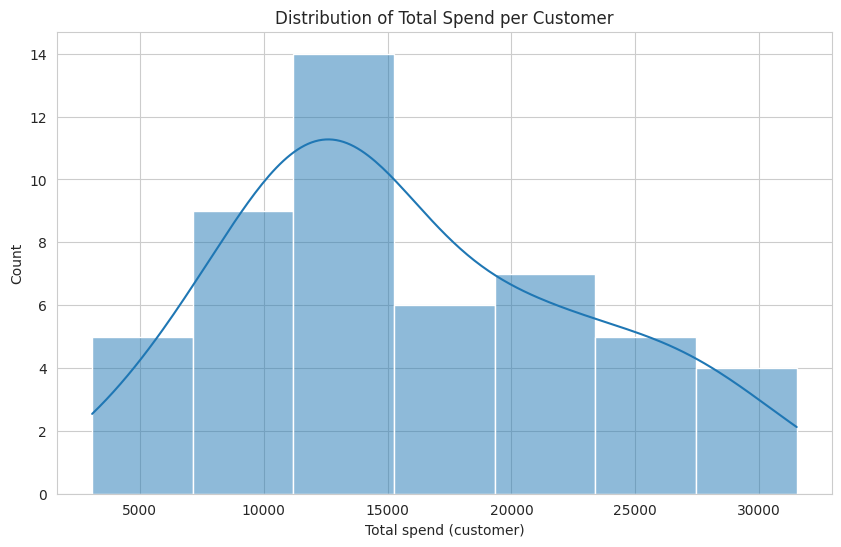

In [10]:
# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")


plt.figure()
sns.histplot(spend_per_customer, kde=True)
plt.title("Distribution of Total Spend per Customer")
plt.xlabel("Total spend (customer)")
plt.ylabel("Count")
plt.show()





### 2) Boxplot of item unit prices by category 

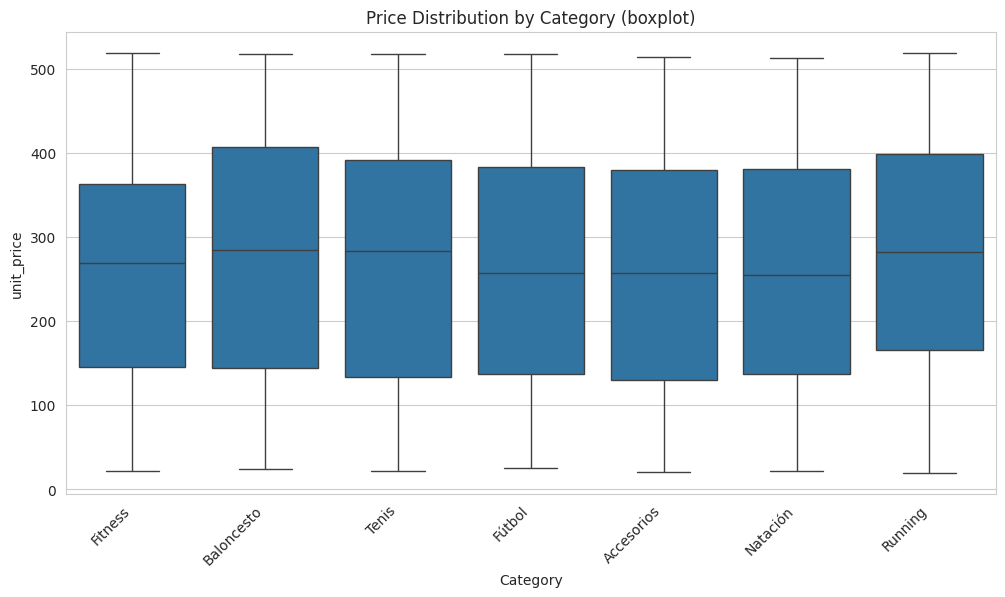

In [11]:

price_col_for_plot = unit_price_col_sales or "line_total"
cat_col_for_plot = cat_name_col

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col_for_plot, y=price_col_for_plot, data=sales_df)
plt.title("Price Distribution by Category (boxplot)")
plt.xticks(rotation=45, ha="right")
plt.ylabel(price_col_for_plot)
plt.xlabel("Category")
plt.show()


### 3)  Top 5 categories and Top 5 products by revenue

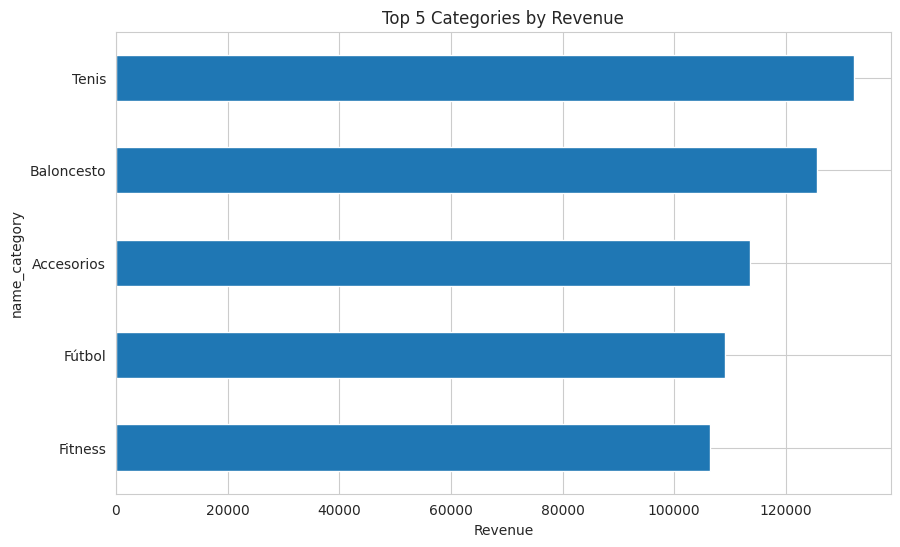

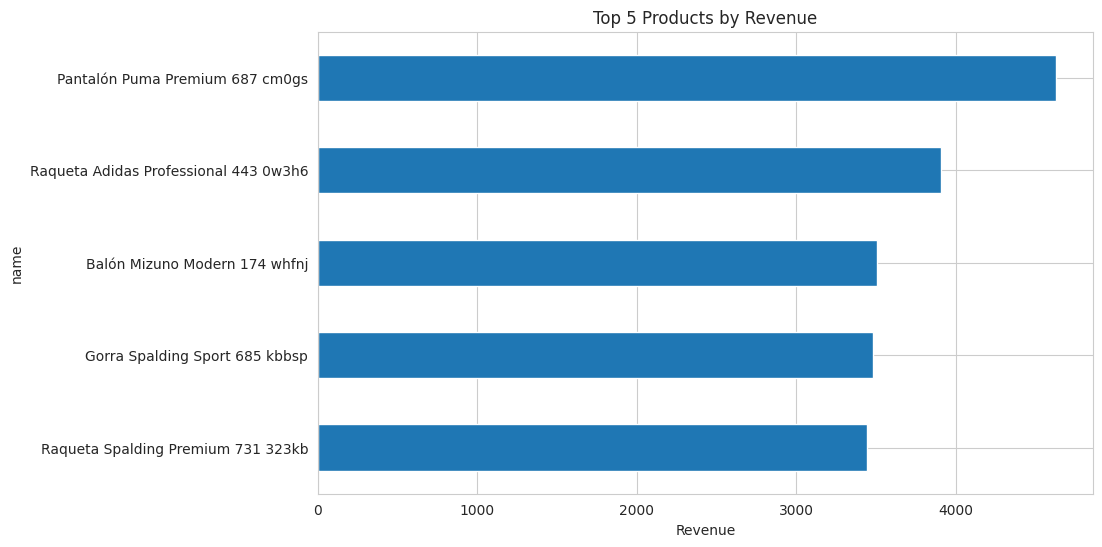

In [12]:
# 3)  Top 5 categories  
plt.figure()
top5_categories.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 5 Categories by Revenue")
plt.xlabel("Revenue")
plt.show()
# Top 5 products by revenue
plt.figure()
top5_products_by_revenue.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

### Insight

After analyzing total sales and price dispersion across categories, it was observed that the Training category concentrates the highest total revenue, while Running shows the greatest price variability (high standard deviation).
This suggests that Running products range from affordable options to high-end items, attracting different customer segments.
Additionally, cities with higher total revenue also exhibit a higher average ticket, reinforcing the idea that customer spending is related to the predominant product types in each local market.

### Recommendation

Segment the Running category into two product lines:

Basic Line, focused on entry-level products, offering volume discounts or combo deals.

Premium Line, positioned as aspirational, with training bundles and exclusive benefits.

Furthermore, cities with lower average tickets should receive price-focused campaigns (discounts and combos), while those with higher spending should be targeted with value-added strategies (premium products, loyalty programs, or experiential offers).